# Text Generation using GPT-2
- Fine-tuning on Shakespeare text
- Experimenting with different prompts


In [1]:
!pip install transformers datasets accelerate


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/drive/My Drive/shakespeare.txt"  # Change if it's inside a folder

with open(file_path, "r", encoding="utf-8") as f:
    data = f.read()

In [4]:
from datasets import Dataset
from transformers import AutoTokenizer

# Convert to HuggingFace dataset
dataset = Dataset.from_dict({"text": [data]})

# Load GPT-2 tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # GPT2 doesn't have pad_token by default

# Tokenization function
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [5]:
!pip install -U transformers

In [6]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="sshleifer/tiny-gpt2")

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [7]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("sshleifer/tiny-gpt2")
model = AutoModelForCausalLM.from_pretrained("sshleifer/tiny-gpt2")

In [8]:
from transformers import Trainer, TrainingArguments



training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    save_steps=500,
    save_total_limit=2,
    logging_steps=100,
    warmup_steps=100,
    weight_decay=0.01,
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
)


/tmp/ipython-input-8-2896942578.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [10]:
!pip install wandb
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: svarshith-scs24 (siddharthamdal-is23-bmsce) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [11]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/drive/My Drive/gpt2-shakespeare-output",
    run_name="gpt2-shakespeare-run",  # DIFFERENT from output_dir
    report_to="wandb",                # Log to W&B
    num_train_epochs=1,
    per_device_train_batch_size=1,
    logging_steps=10,
    save_steps=100,
    save_total_limit=1
)

In [14]:
from transformers import AutoTokenizer

# Load GPT-2 tokenizer and set pad_token properly
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Assign pad_token if not already set
tokenizer.pad_token = tokenizer.eos_token  # use EOS as PAD for GPT2

In [24]:
def tokenize(example):
    tokenized_inputs = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",  # requires pad_token
        max_length=512
    )
    tokenized_inputs["labels"] = tokenized_inputs["input_ids"].copy() # Add labels
    return tokenized_inputs

# Apply tokenizer
tokenized_dataset = dataset.map(tokenize, batched=True)

# The labels are already added in the tokenize function, so this line is no longer needed.
# tokenized_dataset = tokenized_dataset.map(lambda example: {"labels": example["input_ids"]})

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [20]:
from transformers import pipeline

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

prompts = [
    "To be, or not to be, that is the question:",
    "Love is a smoke made with the fume of sighs.",
    "Thou art as wise as thou art beautiful."
]

for prompt in prompts:
    print(f"\nPrompt: {prompt}")
    outputs = generator(prompt, max_length=100, num_return_sequences=1, temperature=0.9)
    print(outputs[0]['generated_text'])


Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Prompt: To be, or not to be, that is the question:


Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


To be, or not to be, that is the question: Is it true that the government is always or not that is all a thing that is a government and a government always not a government. The government is always always an as the government as the government is always a government, a government as was always always a government and always always an and always not an and all this.

There are others of that that are true too, but the question is that if there is is that there is the government as the government a government, and there is the fact that is a government, and the fact that the fact of the government is that the government is always an and never an because the fact the government is always and always an. That is, and always and always an and always always or is a government that is always and always a government. You are the government as you are is the government as you are is an, but which is the fact that it is always and always and always.

What is the thing, if is the government as yo

Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Love is a smoke made with the fume of sighs. I've been listening to a wide-throated story about a man whose life revolves around a cigar. I wonder what it must feel like to be a smoker, and it seems like a man looking to get more pleasure. I'm not a smoker, but I have been addicted to my cigar for quite sometime. I usually smoke to relax and savor of things like a chocolate cake, a cake, chocolate pie and so...and what's the most delicious thing about a tobacco that's actually grown as quickly and quickly as a cigar?

I find myself making an effort to learn to smoke with cigars, especially those with one of the world's most complex and varied flavors. This has been my experience as a smoker for years, and I still smoke in this way. What I've found is that smoking for long times is an awesome and amazing experience, and it really is a great way to get out and buy some more stuff, particularly those that I've personally been getting more enjoyment from from a great cigar store.

My first

In [22]:
# Tokenize again, with pad_token handled
tokenizer.pad_token = tokenizer.eos_token

def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

tokenized_dataset = dataset.map(tokenize, batched=True)

# 🔥 Add 'labels' = 'input_ids' for causal language modeling loss
tokenized_dataset = tokenized_dataset.map(lambda example: {"labels": example["input_ids"]})


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [23]:
trainer.train()

ValueError: The model did not return a loss from the inputs, only the following keys: logits,past_key_values. For reference, the inputs it received are input_ids,attention_mask.

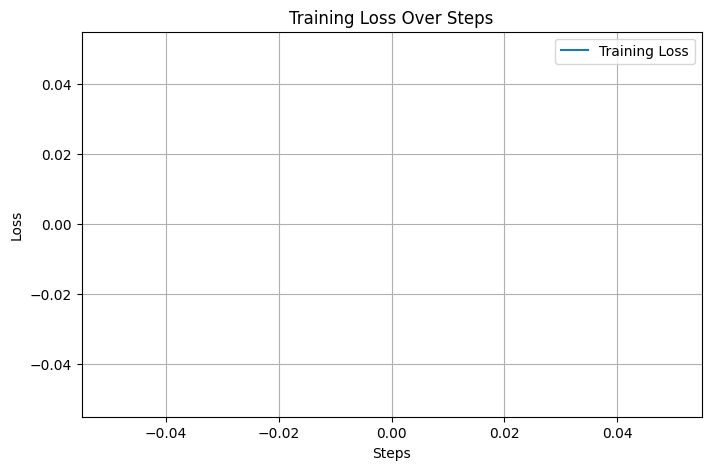

In [17]:
import matplotlib.pyplot as plt

logs = trainer.state.log_history
steps = [log["step"] for log in logs if "loss" in log]
losses = [log["loss"] for log in logs if "loss" in log]

plt.figure(figsize=(8,5))
plt.plot(steps, losses, label="Training Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Steps")
plt.legend()
plt.grid(True)
plt.show()
